<a href="https://colab.research.google.com/github/MillerAJ/Bloom-Study/blob/main/AggregatedAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load and Aggregate Data

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# download the csv files
herbs_fls = "https://drive.usercontent.google.com/download?id=1Tnqv2NFP_eVk4FlKDutG8WiZChMb1IXJ&export=download&authuser=0&confirm=t&uuid=04222442-e4aa-4c45-a84c-4ebf2fa5bb69&at=APZUnTUE9_Q8Y1qB5MEE1PXu1o4e:1715038469023"
herbs_mohonk = "https://drive.usercontent.google.com/download?id=1gKP7YlQeEiQ8ivgKbKdO8Ikivxd_oWUI&export=download&authuser=0&confirm=t&uuid=ada2dfc9-0576-414d-a185-e7f2ea2703d6&at=APZUnTWtLiEMLr_O__Z-14c-W4pq:1715038451287"
pheno_red_maple_breaking_leaves = "https://drive.usercontent.google.com/download?id=1d5fzvGjQP0D-U62eTdwYmenTvCbH6AMZ&export=download&authuser=0&confirm=t&uuid=e63b6c24-c8ad-4364-b88a-a39cbb9cb934&at=APZUnTULF6dNjsHqziXn9k_Rix2-:1715039951490"
pheno_red_maple_colored_leaves = "https://drive.usercontent.google.com/download?id=1AuoxnOtVjuSUBgoop2EYuGEyc8A9rnQP&export=download&authuser=0&confirm=t&uuid=5ffbe48c-bcd3-4f7c-9b10-32df8977d94f&at=APZUnTW-gQZXRNLHbocL9PRTO5-d:1715039954146"
pheno_woody_breaking_leaves = "https://drive.usercontent.google.com/download?id=1-JXNEX95PpJeyHCpO7EG1Dy-gcHSLjmP&export=download&authuser=0&confirm=t&uuid=fb851c17-f0b5-40d6-bba1-476a026d4387&at=APZUnTULYhkddgSFRBWc4q_nHLcT:1715039956424"
pheno_woody_colored_leaves = "https://drive.usercontent.google.com/download?id=19PSpoTsXrjib7wuqgYntOntiESziIOXx&export=download&authuser=0&confirm=t&uuid=a721bbef-7e6c-451f-8185-8d6daecad9dc&at=APZUnTXp3u3hoJVq986rO325v7Yj:1715039958282"

# load files into pandas
herb_fls = pd.read_csv(herbs_fls)
herb_mohonk = pd.read_csv(herbs_mohonk, encoding='latin1')
maple_break = pd.read_csv(pheno_red_maple_breaking_leaves)
maple_color = pd.read_csv(pheno_red_maple_colored_leaves)
woody_break = pd.read_csv(pheno_woody_breaking_leaves)
woody_color = pd.read_csv(pheno_woody_colored_leaves)


In [ ]:
herb_mohonk['Scientific_Name'] = herb_mohonk['Scientific_Name'].str.strip()
herb_mohonk['Scientific_Name'] = herb_mohonk['Scientific_Name'].str.replace('\xa0', '_')
herb_mohonk['Genus'] = herb_mohonk['Scientific_Name'].str.split('_').str[0]
herb_mohonk['Species'] = herb_mohonk['Scientific_Name'].str.split('_').str[1]
herb_mohonk['Site_Name']='Mohonk'
herb_mohonk['State']='NY'
herb_mohonk['Event']='bloom'
herb_mohonk['Pheno'] = 'herb'
herb_mohonk = herb_mohonk.drop(columns = ['Common_Name', 'Scientific_Name'])
herb_mohonk = herb_mohonk.rename(columns={'JD_First_Fls':'DOY'})
print(herb_mohonk.shape)
herb_mohonk.head()

(2445, 8)


,Year,DOY,Genus,Species,Site_Name,State,Event,Pheno
0,1979,235.0,Gentiana,clausa,Mohonk,NY,bloom,herb
1,1994,270.0,Gentiana,clausa,Mohonk,NY,bloom,herb
2,1995,248.0,Gentiana,clausa,Mohonk,NY,bloom,herb
3,2004,274.0,Gentiana,clausa,Mohonk,NY,bloom,herb
4,2007,266.0,Gentiana,clausa,Mohonk,NY,bloom,herb


In [ ]:
herb_fls['Event'] = 'bloom'
herb_fls['Pheno'] = 'herb'
herb_fls = herb_fls.rename(columns = {'First_Yes_DOY':'DOY'})
herb_fls = herb_fls.drop(columns = 'Site_ID')
print(herb_fls.shape)
herb_fls.head()

(1902, 8)


,Genus,Species,Site_Name,State,Year,DOY,Event,Pheno
0,Crocus,spp.,Home,ME,2011,86,bloom,herb
1,Crocus,spp.,Home,ME,2012,69,bloom,herb
2,Crocus,spp.,Home,ME,2013,72,bloom,herb
3,Crocus,spp.,Home,ME,2014,103,bloom,herb
4,Crocus,spp.,Home,ME,2015,98,bloom,herb


In [ ]:
maple_break['Event'] = 'breaking leaves'
maple_break['Pheno'] = 'maple'
maple_break = maple_break.rename(columns = {'Breaking_Lvs_Min_DOY':'DOY'})
maple_break = maple_break.drop(columns = 'Site_ID')
print(maple_break.shape)
maple_break.head()

(545, 8)


,Genus,Species,Site_Name,State,Year,DOY,Event,Pheno
0,Acer,rubrum,Home,ME,2011,117,breaking leaves,maple
1,Acer,rubrum,Home,ME,2012,83,breaking leaves,maple
2,Acer,rubrum,Home,ME,2013,114,breaking leaves,maple
3,Acer,rubrum,Home,ME,2014,125,breaking leaves,maple
4,Acer,rubrum,Home,ME,2015,124,breaking leaves,maple


In [ ]:
maple_color['Event'] = 'colored leaves'
maple_color['Pheno'] = 'maple'
maple_color = maple_color.rename(columns = {'Colored_Lvs_Mean_DOY':'DOY'})
maple_color = maple_color.drop(columns = 'Site_ID')
print(maple_color.shape)
maple_color.head()

(512, 8)


,Genus,Species,Site_Name,State,Year,DOY,Event,Pheno
0,Acer,rubrum,PPN_9200010,MI,2011,292.333333,colored leaves,maple
1,Acer,rubrum,PPN_9200010,MI,2012,291.400000,colored leaves,maple
2,Acer,rubrum,PPN_9200010,MI,2013,285.647059,colored leaves,maple
3,Acer,rubrum,PPN_9200010,MI,2014,282.333333,colored leaves,maple
4,Acer,rubrum,PPN_9200010,MI,2015,288.888889,colored leaves,maple


In [ ]:
woody_break['Event'] = 'breaking leaves'
woody_break['Pheno'] = 'woody'
# woody_break = woody_break.rename(columns = {'Colored_Lvs_Mean_DOY':'DOY'})
woody_break = woody_break.drop(columns = 'Site_ID')
print(woody_break.shape)
woody_break.head()

(4927, 8)


,Genus,Species,Site_Name,State,Year,DOY,Event,Pheno
0,Acer,rubrum,Home,ME,2011,117,breaking leaves,woody
1,Acer,rubrum,Home,ME,2012,83,breaking leaves,woody
2,Acer,rubrum,Home,ME,2013,114,breaking leaves,woody
3,Acer,rubrum,Home,ME,2014,125,breaking leaves,woody
4,Acer,rubrum,Home,ME,2015,124,breaking leaves,woody


In [ ]:
woody_color['Event'] = 'colored leaves'
woody_color['Pheno'] = 'woody'
woody_color = woody_color.rename(columns = {'Colored_Lvs_Mean_DOY':'DOY'})
woody_color = woody_color.drop(columns = 'Site_ID')
print(woody_color.shape)
woody_color.head()

(4600, 8)


,Genus,Species,Site_Name,State,Year,DOY,Event,Pheno
0,Acer,saccharum,Home,ME,2011,294.750000,colored leaves,woody
1,Acer,saccharum,Home,ME,2012,290.555556,colored leaves,woody
2,Acer,saccharum,Home,ME,2013,282.045455,colored leaves,woody
3,Acer,saccharum,Home,ME,2014,279.818182,colored leaves,woody
4,Acer,saccharum,Home,ME,2015,290.761905,colored leaves,woody


In [ ]:
agg_df = pd.concat([
                    herb_fls,
                    herb_mohonk,
                    maple_break,
                    maple_color,
                    woody_break,
                    woody_color
                  ])

In [ ]:
agg_df.shape

(14931, 8)

In [ ]:
break_df = agg_df[agg_df['Event']=='breaking leaves'].reset_index(drop=True)
print('break_df rows: ', break_df.shape)
color_df = agg_df[agg_df['Event']=='colored leaves'].reset_index(drop=True)
print('color_df rows: ',color_df.shape)
bloom_df = agg_df[agg_df['Event']=='bloom'].reset_index(drop=True)
print('bloom_df rows: ',bloom_df.shape)

break_df rows:  (5472, 8)
color_df rows:  (5112, 8)
bloom_df rows:  (4347, 8)


#Visualize Data

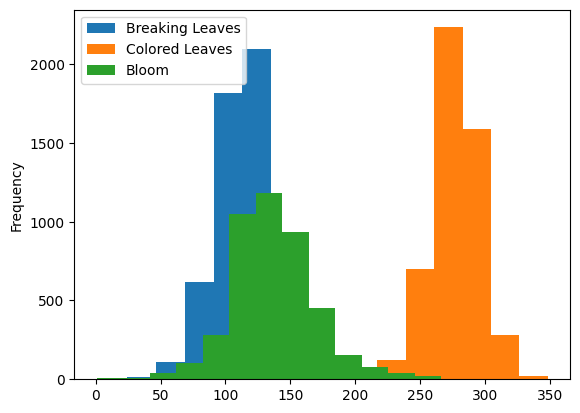

In [ ]:
import matplotlib.pyplot as plt

break_df['DOY'].plot.hist(label='Breaking Leaves', bins=15)
color_df['DOY'].plot.hist(label='Colored Leaves', bins=15)
bloom_df['DOY'].plot.hist(label='Bloom', bins=15)

plt.legend(loc='upper left')

plt.show()

In [ ]:
bloom_df.head()

,Genus,Species,Site_Name,State,Year,DOY,Event,Pheno
0,Crocus,spp.,Home,ME,2011,86.0,bloom,herb
1,Crocus,spp.,Home,ME,2012,69.0,bloom,herb
2,Crocus,spp.,Home,ME,2013,72.0,bloom,herb
3,Crocus,spp.,Home,ME,2014,103.0,bloom,herb
4,Crocus,spp.,Home,ME,2015,98.0,bloom,herb


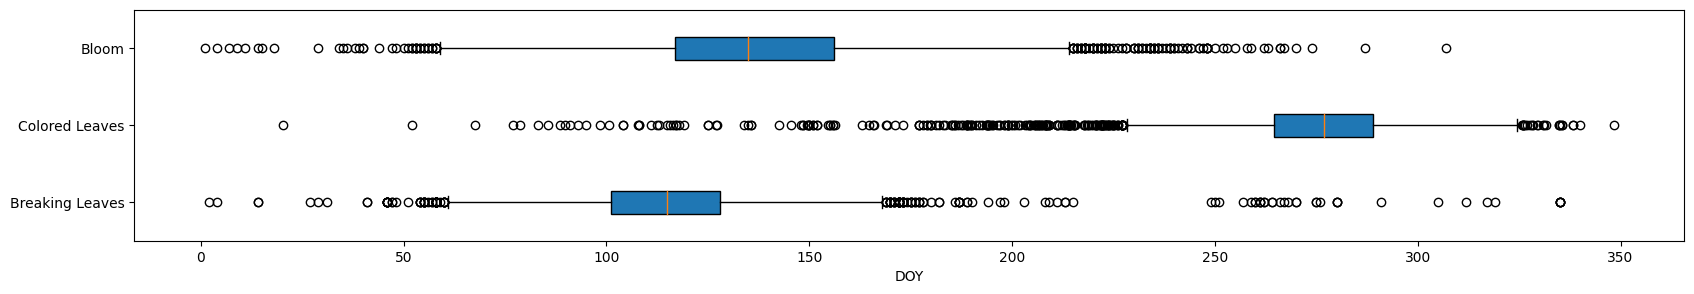

In [ ]:
data = [break_df['DOY'], color_df['DOY'], bloom_df['DOY']]
plt.figure(figsize=(20,3))
plt.boxplot(data, labels=['Breaking Leaves', 'Colored Leaves', 'Bloom'], patch_artist=True, vert=False)
plt.xlabel('DOY')
plt.show()

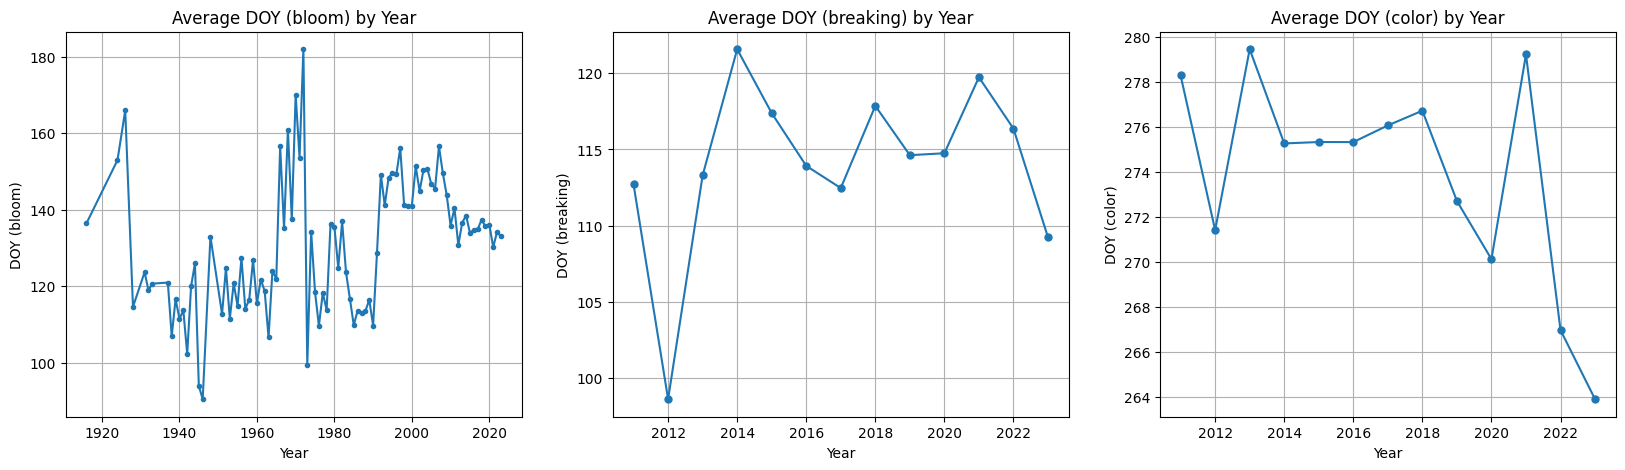

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

# plot bloom datat
bloom_df_yearly = bloom_df.groupby('Year')['DOY'].mean().reset_index()
plt.subplot(1, 3, 1)
plt.plot(bloom_df_yearly['Year'], bloom_df_yearly['DOY'], marker='o',markersize=3, linestyle='-')
plt.ylabel('DOY (bloom)')
plt.xlabel('Year')
plt.title('Average DOY (bloom) by Year')
plt.grid(True)

# plot breaking data
break_df_yearly = break_df.groupby('Year')['DOY'].mean().reset_index()
plt.subplot(1, 3, 2)
plt.plot(break_df_yearly['Year'], break_df_yearly['DOY'], marker='o',markersize=5, linestyle='-')
plt.ylabel('DOY (breaking)')
plt.xlabel('Year')
plt.title('Average DOY (breaking) by Year')
plt.grid(True)

# plot color data
color_df_yearly = color_df.groupby('Year')['DOY'].mean().reset_index()
plt.subplot(1, 3, 3)
plt.plot(color_df_yearly['Year'], color_df_yearly['DOY'], marker='o',markersize=5, linestyle='-')
plt.ylabel('DOY (color)')
plt.xlabel('Year')
plt.title('Average DOY (color) by Year')
plt.grid(True)

plt.show()

# Bloom Analysis

In [ ]:
state_counts = bloom_df['State'].value_counts()

fig = go.Figure(data=go.Choropleth(
    locations=state_counts.index,
    z=state_counts.values,
    locationmode='USA-states',
    colorscale='YlGnBu',
    colorbar_title='Count',
))

fig.update_layout(
    title_text='Number of observations/datapoints by State',
    geo_scope='usa',
)

fig.show()

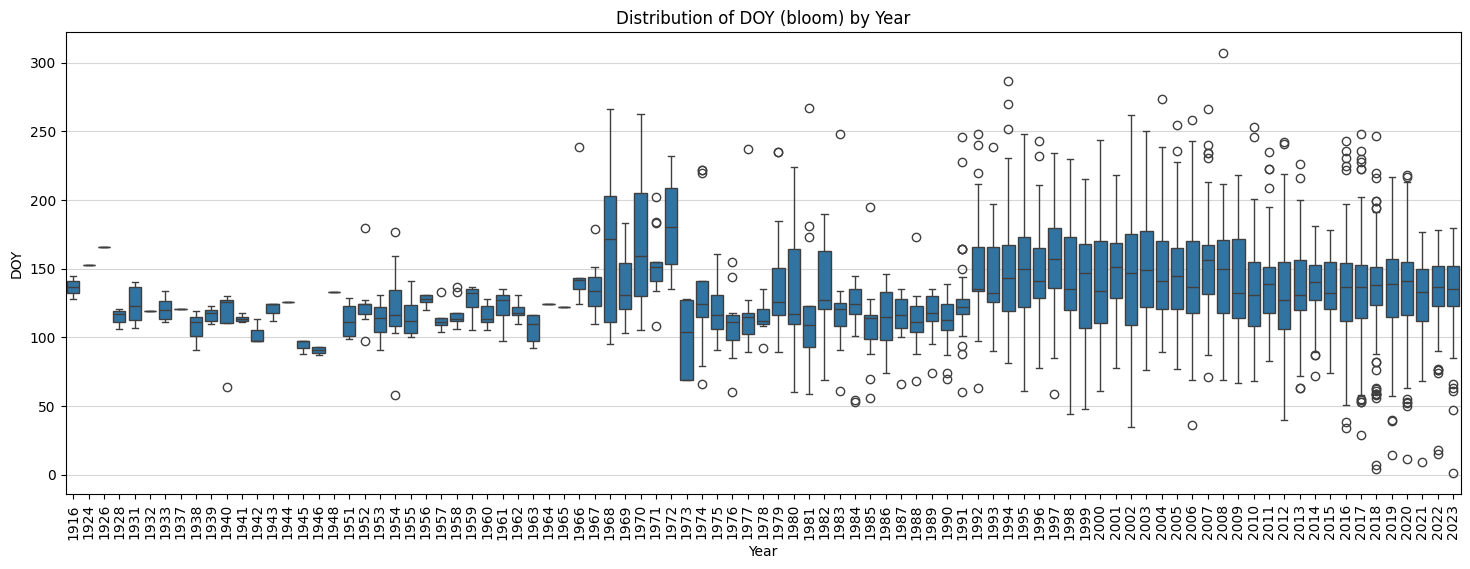

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,6))
sns.boxplot(x='Year', y='DOY', data=bloom_df)

plt.title('Distribution of DOY (bloom) by Year')
plt.xlabel('Year')
plt.ylabel('DOY')
plt.xticks(rotation=90)
plt.grid(True, alpha=.50, axis='y')

plt.show()

In [ ]:
import pandas as pd

grouped_df = bloom_df.groupby('Year')

# Define a custom function to count outliers
def count_outliers(group):
    q1 = group['DOY'].quantile(0.25)
    q3 = group['DOY'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers_below = group[group['DOY'] < lower_bound].shape[0]
    outliers_above = group[group['DOY'] > upper_bound].shape[0]
    return pd.Series({'Outliers below': outliers_below, 'Outliers above': outliers_above})

# Apply the custom function to each group
result_df = grouped_df.apply(count_outliers).reset_index()
result_df.head()

,Year,Outliers below,Outliers above
0,1916,0,0
1,1924,0,0
2,1926,0,0
3,1928,0,0
4,1931,0,0


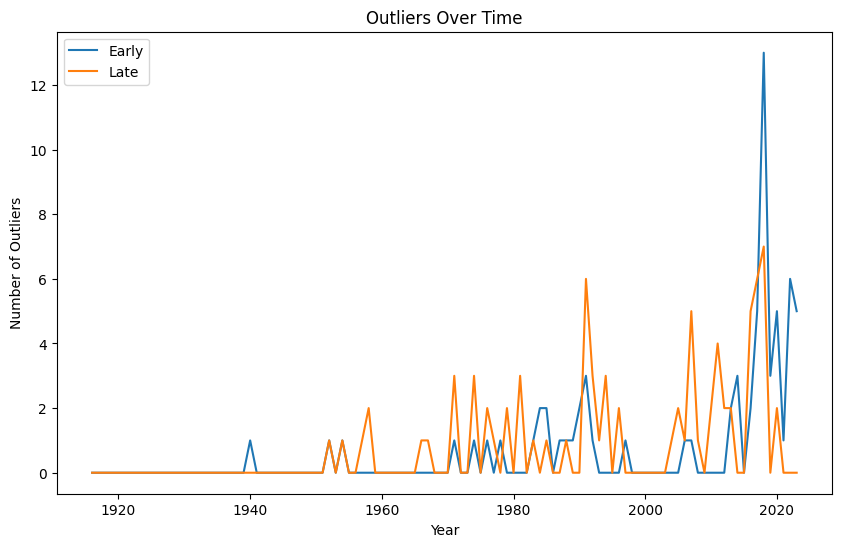

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(result_df['Year'], result_df['Outliers below'], label='Early')
plt.plot(result_df['Year'], result_df['Outliers above'], label='Late')
plt.xlabel('Year')
plt.ylabel('Number of Outliers')
plt.title('Outliers Over Time')
plt.legend()
plt.show()

# Colored Leaves Analysis

In [ ]:

state_counts = color_df['State'].value_counts()

fig = go.Figure(data=go.Choropleth(
    locations=state_counts.index,
    z=state_counts.values,
    locationmode='USA-states',
    colorscale='YlGnBu',
    colorbar_title='Count',
))

fig.update_layout(
    title_text='Number of observations/datapoints by State',
    geo_scope='usa',
)

fig.show()

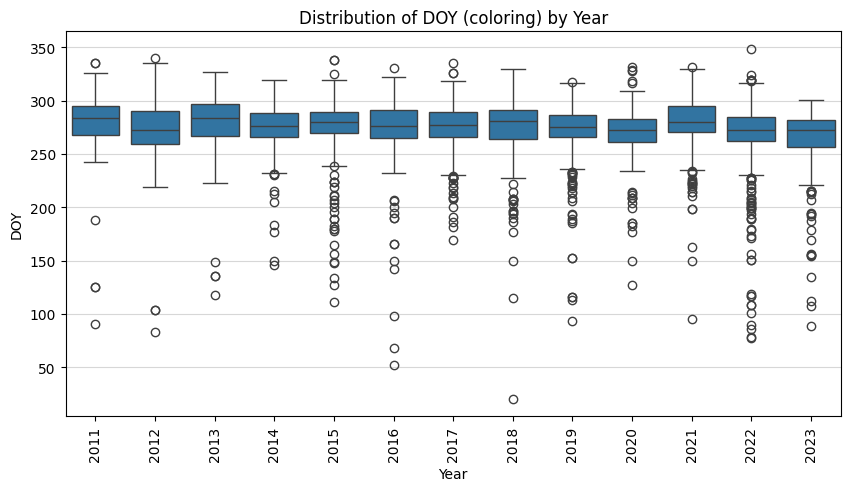

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(x='Year', y='DOY', data=color_df)

plt.title('Distribution of DOY (coloring) by Year')
plt.xlabel('Year')
plt.ylabel('DOY')
plt.xticks(rotation=90)
plt.grid(True, alpha=.50, axis='y')

plt.show()

In [ ]:
import pandas as pd

# Assuming color_df is your DataFrame
grouped_df = color_df.groupby('Year')

# Define a custom function to count outliers
def count_outliers(group):
    q1 = group['DOY'].quantile(0.25)
    q3 = group['DOY'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers_below = group[group['DOY'] < lower_bound].shape[0]
    outliers_above = group[group['DOY'] > upper_bound].shape[0]
    return pd.Series({'Outliers below': outliers_below, 'Outliers above': outliers_above})

# Apply the custom function to each group
result_df = grouped_df.apply(count_outliers).reset_index()
result_df.head()

,Year,Outliers below,Outliers above
0,2011,4,2
1,2012,3,1
2,2013,4,0
3,2014,10,0
4,2015,25,3


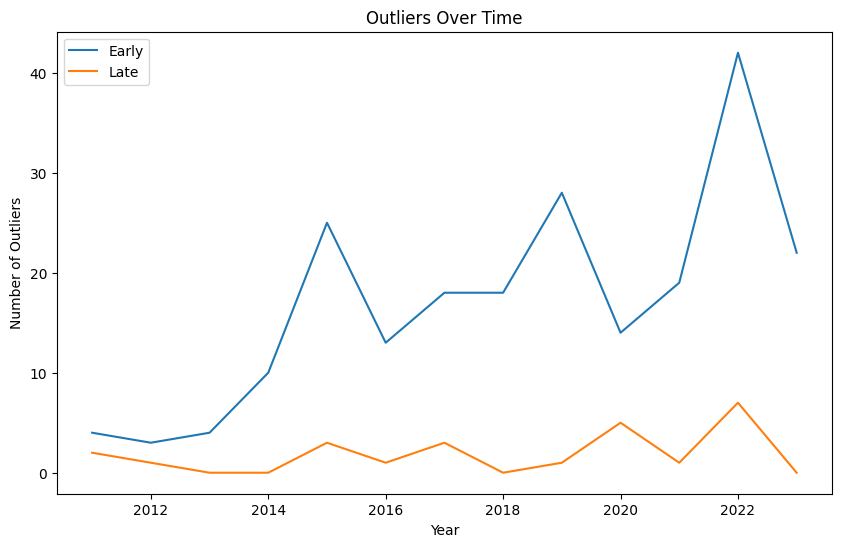

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(result_df['Year'], result_df['Outliers below'], label='Early')
plt.plot(result_df['Year'], result_df['Outliers above'], label='Late')
plt.xlabel('Year')
plt.ylabel('Number of Outliers')
plt.title('Outliers Over Time')
plt.legend()
plt.show()

# Break Analysis

In [ ]:
import plotly.graph_objects as go
state_counts = break_df['State'].value_counts()

fig = go.Figure(data=go.Choropleth(
    locations=state_counts.index,
    z=state_counts.values,
    locationmode='USA-states',
    colorscale='YlGnBu',
    colorbar_title='Count',
))

fig.update_layout(
    title_text='Number of observations/datapoints by State',
    geo_scope='usa',
)

fig.show()

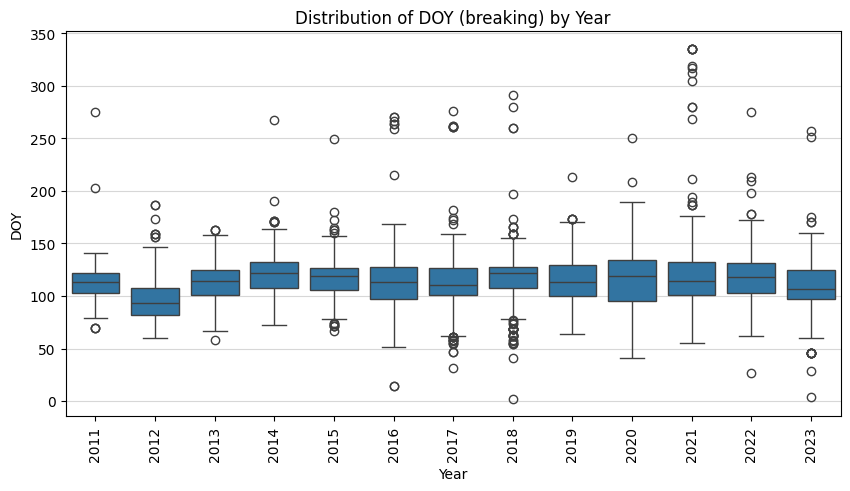

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Year', y='DOY', data=break_df)
plt.title('Distribution of DOY (breaking) by Year')
plt.xlabel('Year')
plt.ylabel('DOY')
plt.xticks(rotation=90)
plt.grid(True, alpha=.50, axis='y')
plt.show()

In [ ]:
import pandas as pd

grouped_df = break_df.groupby('Year')

# Define a custom function to count outliers
def count_outliers(group):
    q1 = group['DOY'].quantile(0.25)
    q3 = group['DOY'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers_below = group[group['DOY'] < lower_bound].shape[0]
    outliers_above = group[group['DOY'] > upper_bound].shape[0]
    return pd.Series({'Outliers below': outliers_below, 'Outliers above': outliers_above})

# Apply the custom function to each group
result_df = grouped_df.apply(count_outliers).reset_index()
result_df.head()

,Year,Outliers below,Outliers above
0,2011,3,2
1,2012,0,8
2,2013,1,3
3,2014,0,8
4,2015,7,7


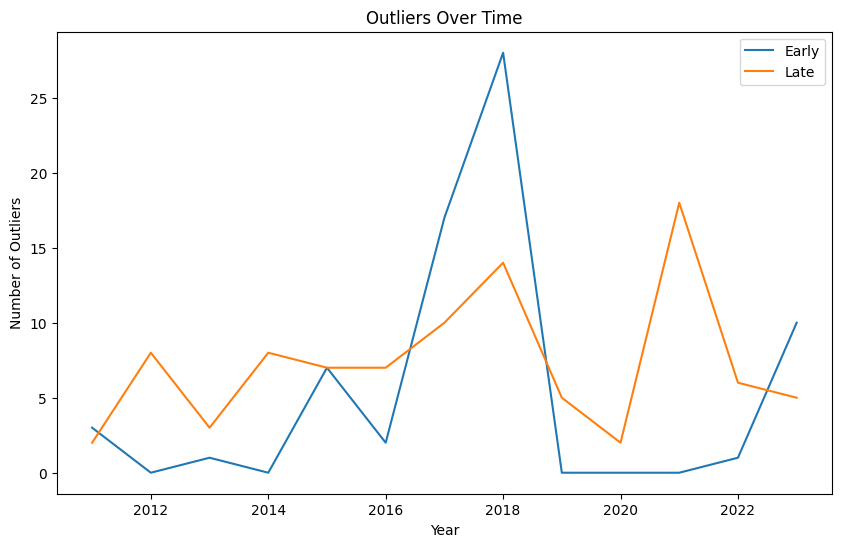

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(result_df['Year'], result_df['Outliers below'], label='Early')
plt.plot(result_df['Year'], result_df['Outliers above'], label='Late')
plt.xlabel('Year')
plt.ylabel('Number of Outliers')
plt.title('Outliers Over Time')
plt.legend()
plt.show()